In [122]:
#Importing Libaries

import numpy as np
import pandas as pd

from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import r2_score,mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing



In [123]:
data = pd.read_csv("dataset/BostonHousing.csv")
print(data.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [124]:
data = pd.DataFrame(data)

print(data.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [125]:
data.shape

(506, 14)

In [126]:
data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [127]:
data.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [128]:
data.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
b          357
lstat      455
medv       229
dtype: int64

In [129]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [130]:
data[data.isnull().any(axis=1)]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv


In [131]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [132]:
#Finding out the correlation between the features
corr = data.corr()
corr.shape

(14, 14)

In [133]:
data.rename(columns={'medv':'price'}, inplace=True)

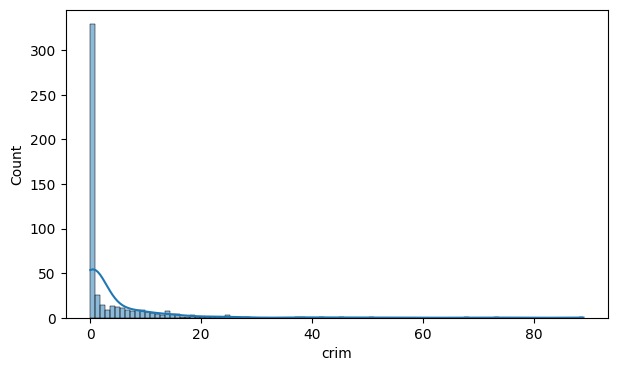

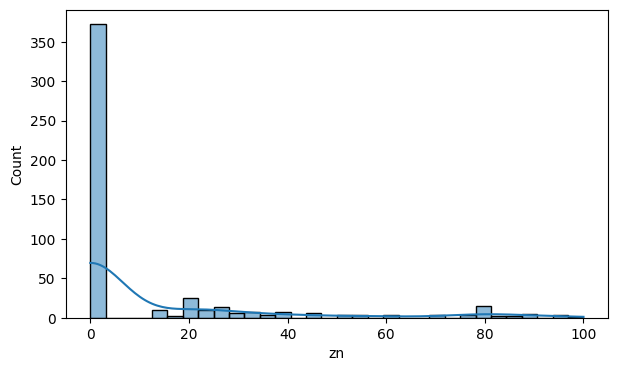

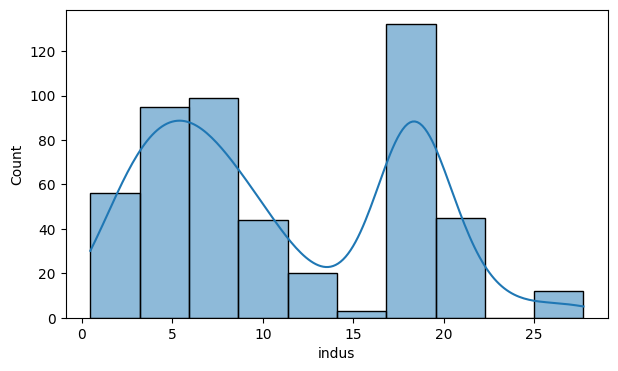

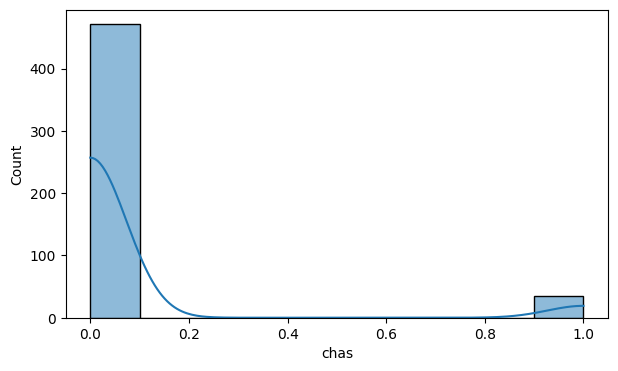

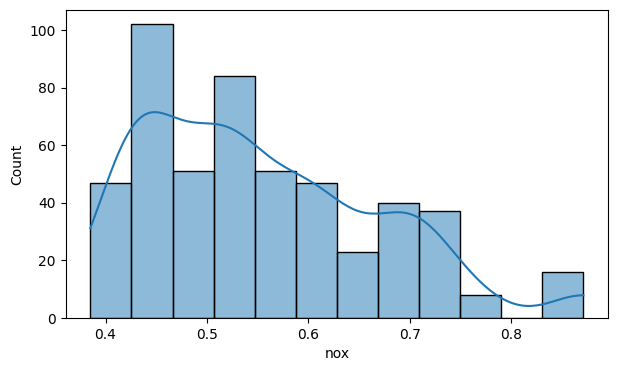

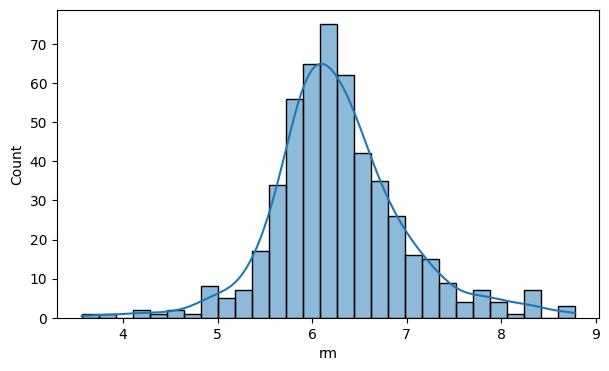

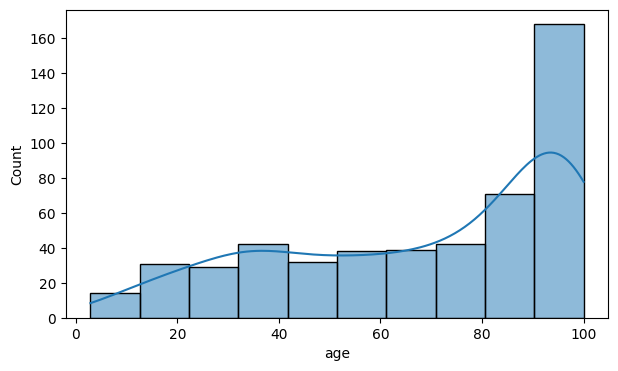

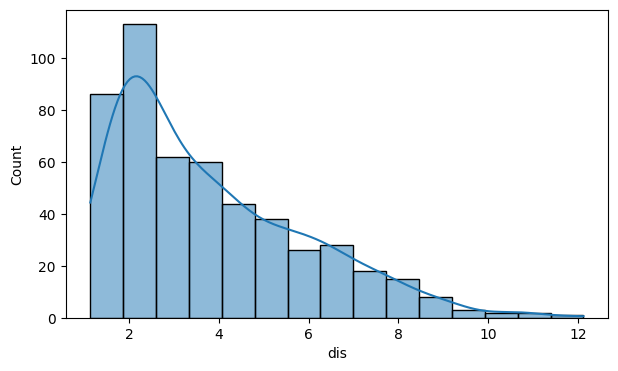

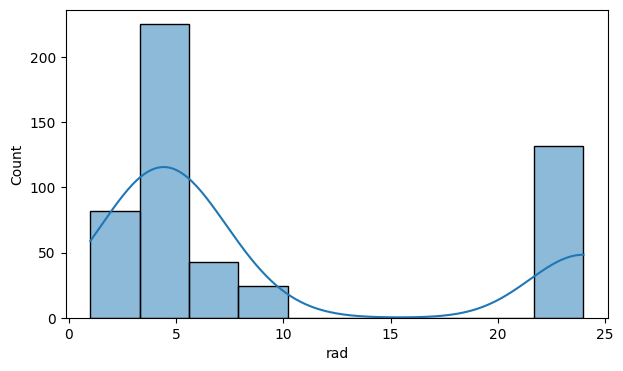

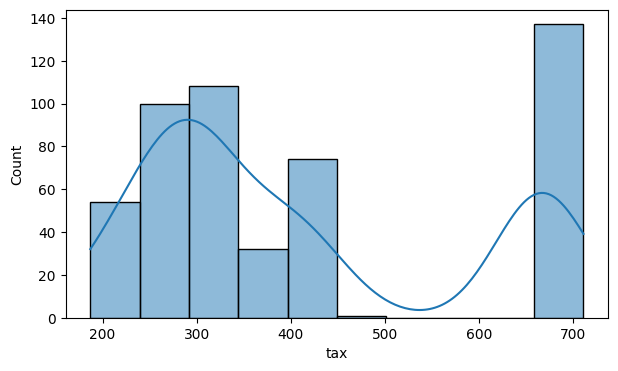

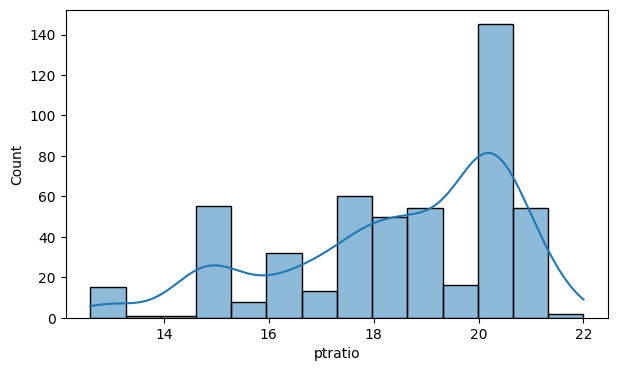

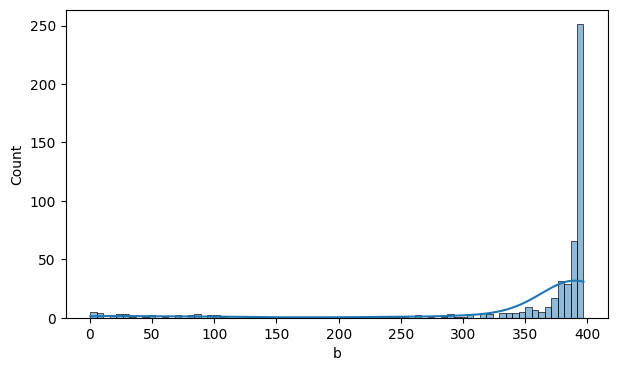

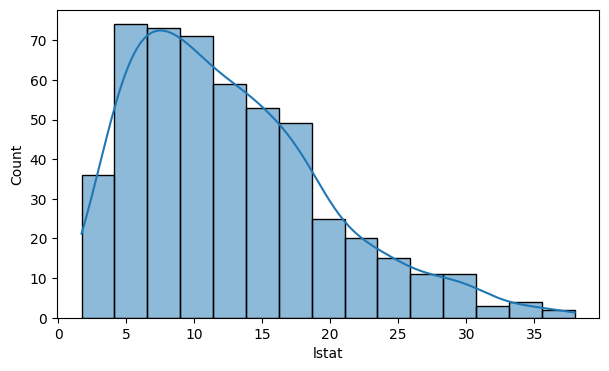

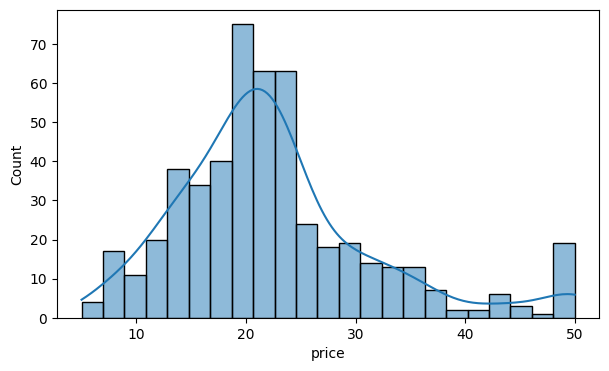

In [258]:
# Plotting all the columns to look at their distributions
for i in data.columns:
    
    plt.figure(figsize = (7, 4))
    
    sns.histplot(data = data, x = i, kde = True)
    
    plt.show()

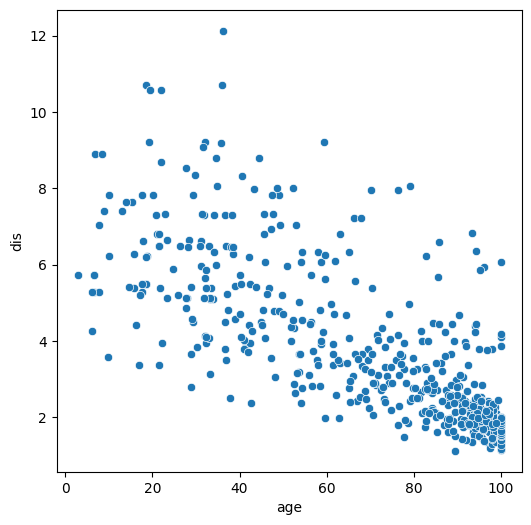

In [260]:
# Scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'age', y = 'dis', data = data)

plt.show()

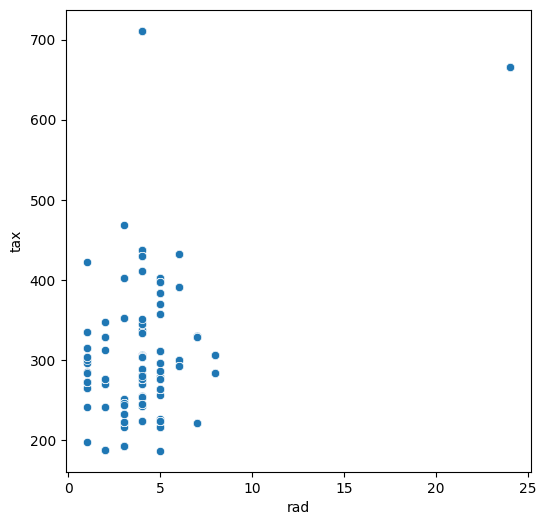

In [261]:
# Scatterplot to visulaize the relationship between RAD and TAX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'rad', y = 'tax', data = data)

plt.show()

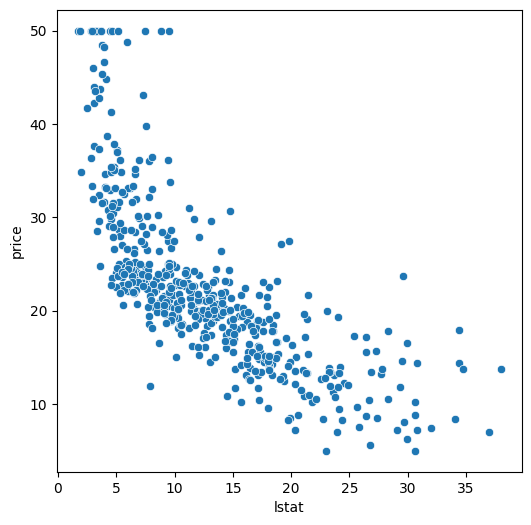

In [263]:
# Scatterplot to visulaize the relationship between LSTAT and MEDV
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'lstat', y = 'price', data = data)

plt.show()

<Axes: >

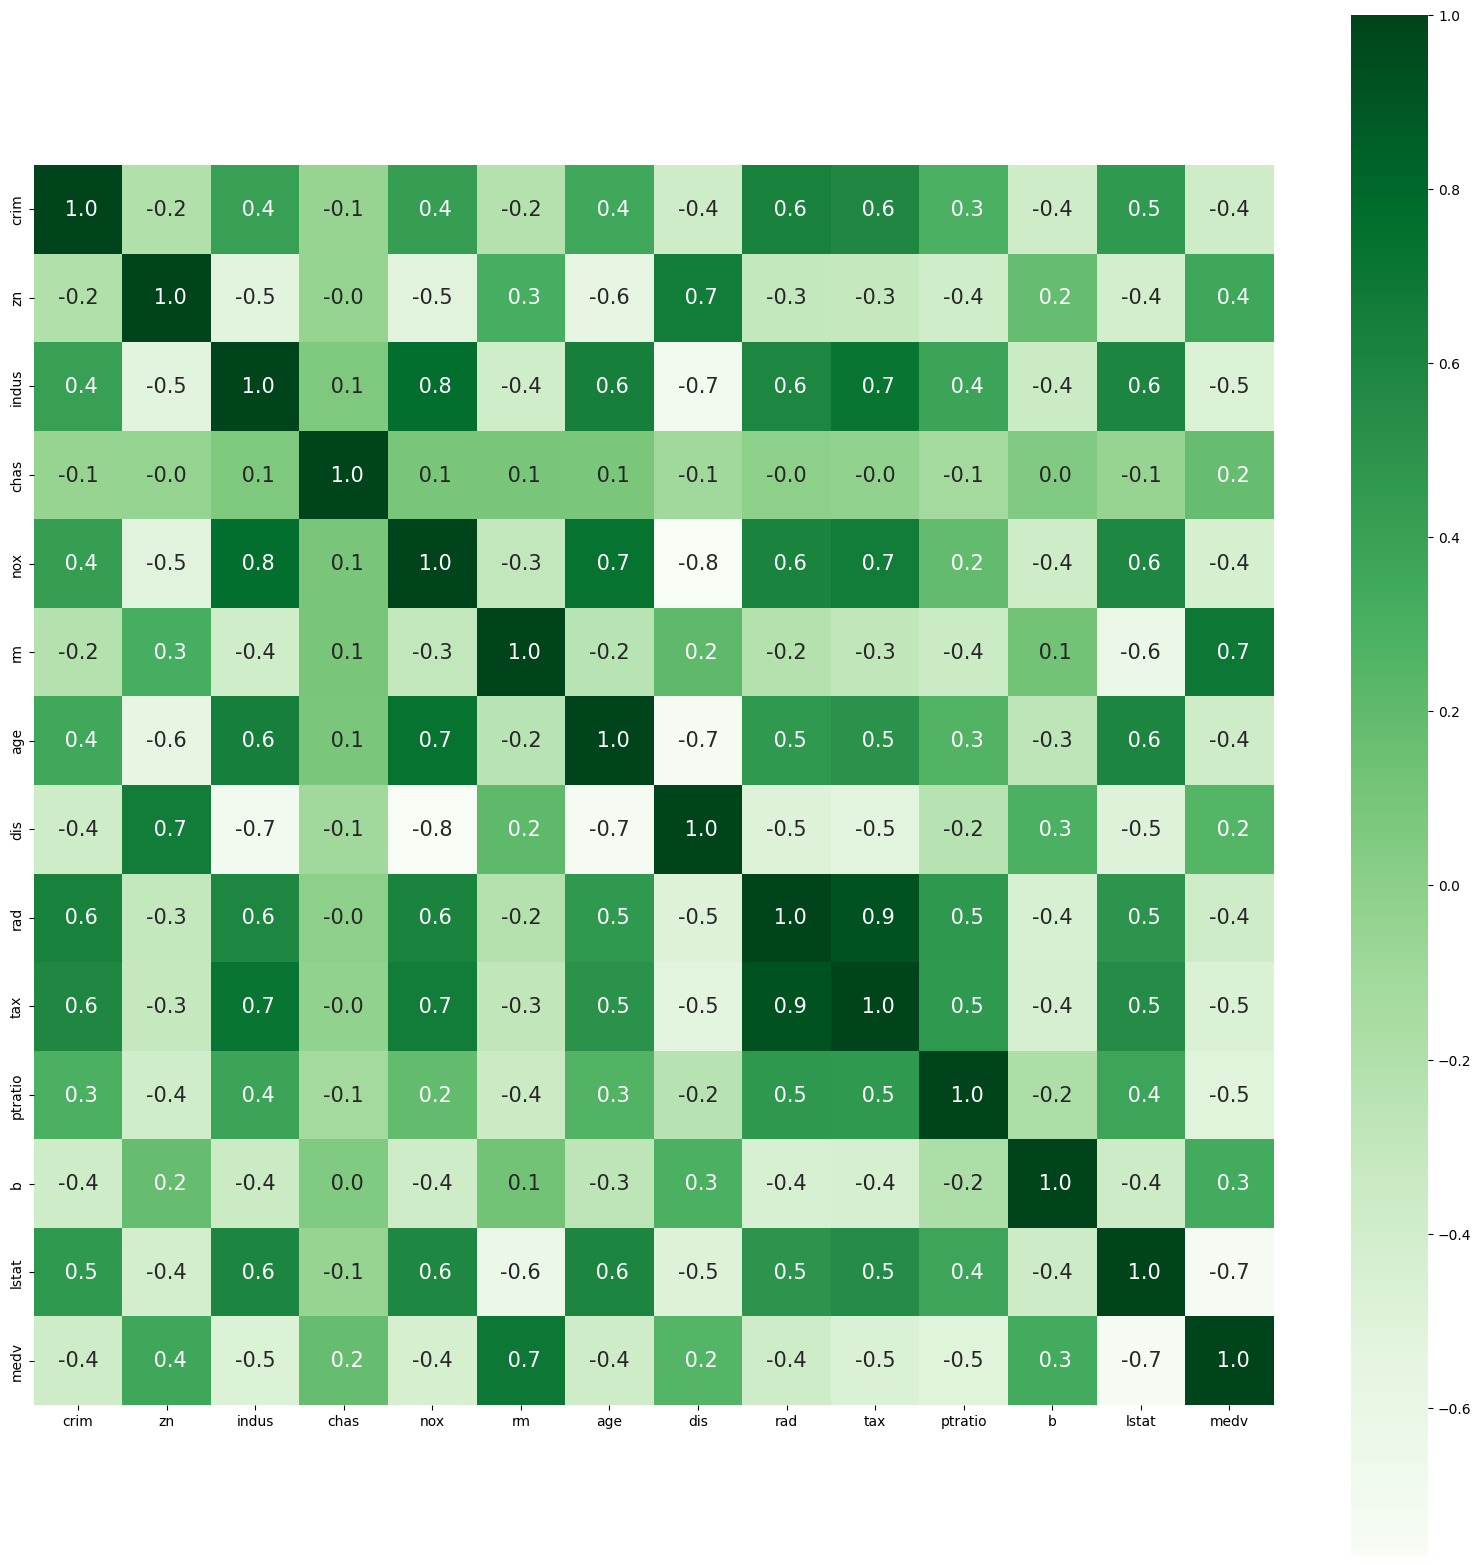

In [134]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr, cbar=True, square= True, fmt = ' .1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [137]:
# calculate the variance inflation factor of each feature and detect multicollinearity
cons_data = sm.tools.add_constant(data)
series_before = pd.Series([variance_inflation_factor(cons_data.values,i) for i in range(cons_data.shape[1])],
                         index=cons_data.columns)
series_before

const      645.977937
crim         1.831537
zn           2.352186
indus        3.992503
chas         1.095223
nox          4.586920
rm           2.260374
age          3.100843
dis          4.396007
rad          7.808198
tax          9.205542
ptratio      1.993016
b            1.381463
lstat        3.581585
price        3.855684
dtype: float64

In [201]:
newdata = data.drop('tax', axis=1)
cons_data2 = sm.tools.add_constant(newdata)

series_after = pd.Series([variance_inflation_factor(cons_data2.values,i) for i in range(cons_data2.shape[1])],
                         index=cons_data2.columns)
series_after

const      631.860301
crim         1.829538
zn           2.216337
indus        3.235660
chas         1.084627
nox          4.578751
rm           2.260029
age          3.098057
dis          4.392557
rad          2.898743
ptratio      1.991741
b            1.381446
lstat        3.561127
price        3.773177
dtype: float64

In [202]:
newdata.columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'ptratio', 'b', 'lstat', 'price']

newdata['price'] = np.log(newdata['price'])

In [203]:
newdata

,crim,zn,indus,chas,nox,rm,age,dis,rad,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98,3.178054
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14,3.072693
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03,3.546740
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94,3.508556
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,18.7,396.90,5.33,3.589059
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,21.0,391.99,9.67,3.109061
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,21.0,396.90,9.08,3.025291
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,21.0,396.90,5.64,3.173878
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,21.0,393.45,6.48,3.091042


In [205]:
from sklearn.model_selection import train_test_split

X = newdata.drop(['price'], axis=1)
Y = newdata['price']

X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.dropna(inplace=True)
X_scaled.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,ptratio,b,lstat
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,0.113032,0.441052,-1.026501


In [247]:
# we now split out data into train and test data
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size=.2,random_state=2)


#### Linear Regression

In [248]:
#Import library for Linear Regression
from sklearn.linear_model import LinearRegression
#Create a Linear regressor
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [249]:
# we now score the model
print('Score on train data: {}\n'.format(lm.score(X_train,Y_train)))
print('Score on test data: {}'.format(lm.score(X_test,Y_test)))

Score on train data: 0.7723769307117627

Score on test data: 0.8114829475683363


In [250]:
prediction = lm.predict(X_test)
mse = mean_squared_error(Y_test,prediction)
lin_accuracy = r2_score(Y_test,prediction)

print('Mean Squared Error: {}\n'.format(mse))
print('Overall model accuracy: {}'.format(lin_accuracy))

Mean Squared Error: 0.03445943381401812

Overall model accuracy: 0.8114829475683363


#### DevisionTreeRegressor

In [251]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, Y_train)
dt_train_results=dt.predict(X_train)
dt_test_results=dt.predict(X_test)

In [252]:
# we now score the model
print('Score on train data: {}\n'.format(dt.score(X_train,Y_train)))
print('Score on test data: {}'.format(dt.score(X_test,Y_test)))

Score on train data: 1.0

Score on test data: 0.7044849894419698


In [253]:
prediction = dt.predict(X_test)
mse = mean_squared_error(Y_test,prediction)
dt_accuracy = r2_score(Y_test,prediction)

print('Mean Squared Error: {}\n'.format(mse))
print('Overall model accuracy: {}'.format(dt_accuracy))

Mean Squared Error: 0.054017818632426814

Overall model accuracy: 0.7044849894419698


#### SVR

In [254]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train, Y_train)
svr_train_results=svr.predict(X_train)
svr_test_results=svr.predict(X_test)

In [255]:
# we now score the model
print('Score on train data: {}\n'.format(svr.score(X_train,Y_train)))
print('Score on test data: {}'.format(svr.score(X_test,Y_test)))

Score on train data: 0.8986904708126874

Score on test data: 0.9111481724115296


In [256]:
prediction = svr.predict(X_test)
mse = mean_squared_error(Y_test,prediction)
svr_accuracy = r2_score(Y_test,prediction)

print('Mean Squared Error: {}\n'.format(mse))
print('Overall model accuracy: {}'.format(svr_accuracy))

Mean Squared Error: 0.016241414941225673

Overall model accuracy: 0.9111481724115296


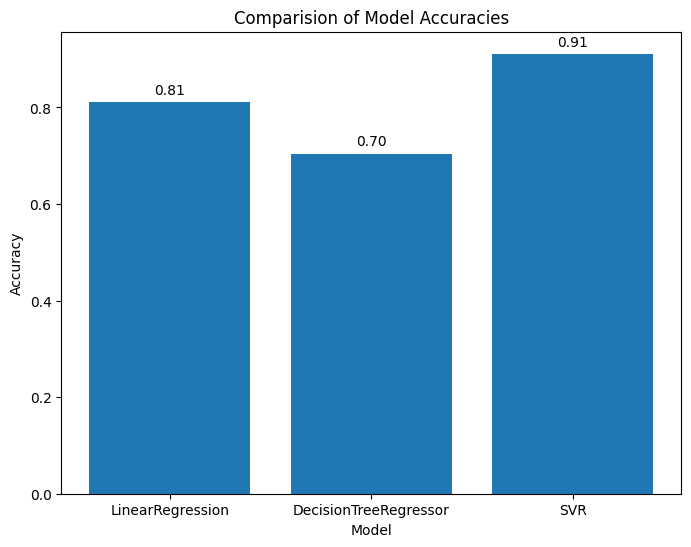

In [257]:
fig, ax = plt.subplots(figsize = (8, 6))

model_names = ['LinearRegression', 'DecisionTreeRegressor', 'SVR']
model_accuracies = [lin_accuracy, dt_accuracy, svr_accuracy]

ax.bar(model_names, model_accuracies)

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Comparision of Model Accuracies')

for i, accuracy in enumerate(model_accuracies):
    ax.text(i, accuracy + 0.01, f"{accuracy:.2f}", ha='center', va='bottom')

plt.show()